In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_skins_combined.csv')
# df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135313 entries, 0 to 135312
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  135313 non-null  float64
 1   price      135313 non-null  float64
 2   volume     135313 non-null  float64
 3   date       135313 non-null  object 
 4   skin_name  135313 non-null  object 
dtypes: float64(3), object(2)
memory usage: 5.2+ MB


In [3]:
skins = list(df["skin_name"].unique())

In [4]:
def reset_skin_dfs():
    global skin_dfs
    skin_dfs = {}
    for skin in skins:
        skin_df = pd.read_csv(f'{skin}.csv')
        skin_df["date"] = pd.to_datetime(skin_df["date"])
        skin_df = skin_df.sort_values("date")
        skin_dfs[skin] = skin_df

reset_skin_dfs()

In [5]:
skin_dfs['karambit_fade_FN'].tail()

,timestamp,price,volume,date
2573,1.761372e+09,1800.000,1.0,2025-10-25 06:00:00
2574,1.761419e+09,1799.995,1.0,2025-10-25 19:00:00
2575,1.761646e+09,1800.548,1.0,2025-10-28 10:00:00
2576,1.762009e+09,1521.020,1.0,2025-11-01 15:00:00
2577,1.762142e+09,1554.618,1.0,2025-11-03 04:00:00


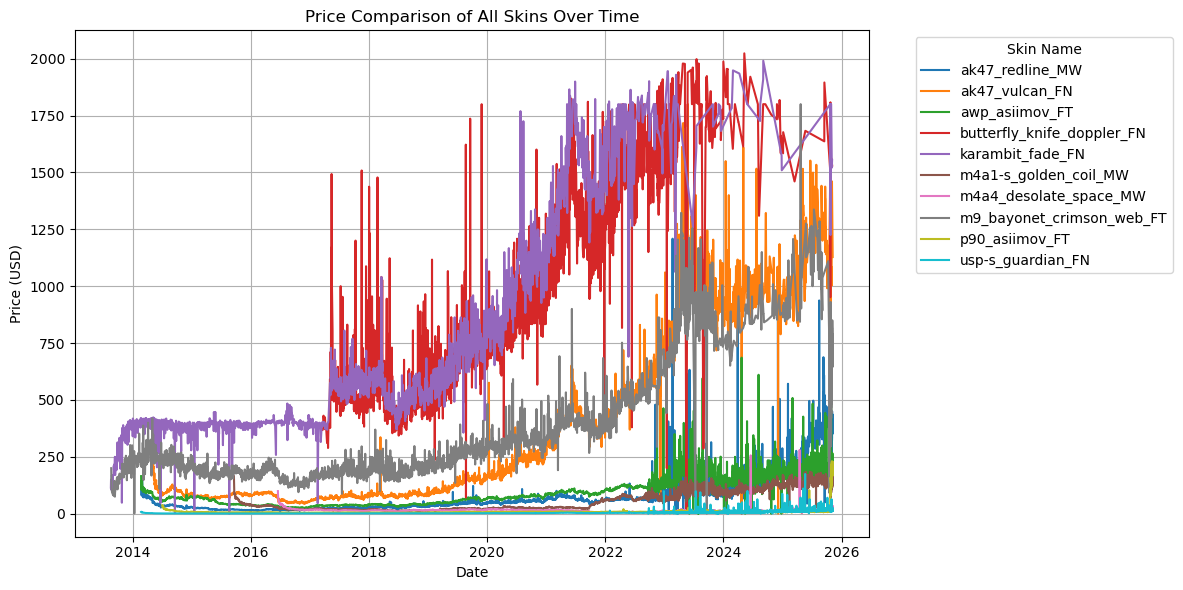

In [6]:
# Plot all skins on the same chart
plt.figure(figsize=(12, 6))
for skin_name in skin_dfs.keys():
    skin_df = skin_dfs[skin_name]
    plt.plot(skin_df["date"], skin_df["price"], label=skin_name, linewidth=1.5)

plt.title("Price Comparison of All Skins Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(title="Skin Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

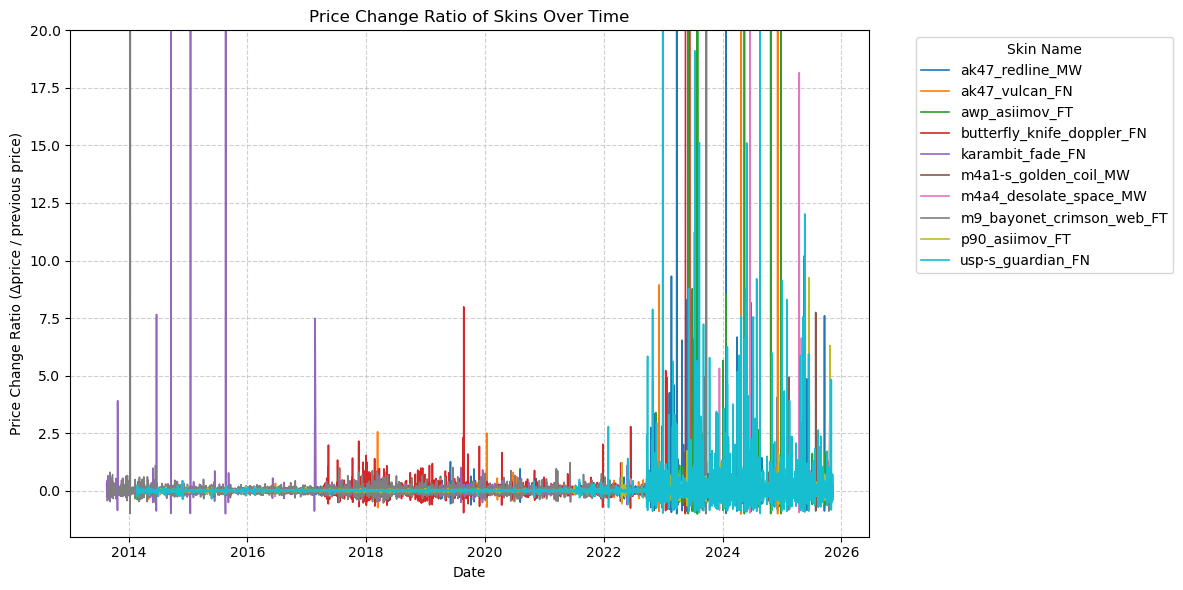

In [7]:
reset_skin_dfs()

for skin_name in skin_dfs.keys():
    skin_df = skin_dfs[skin_name]
    skin_df["price_change_ratio"] = skin_df["price"].pct_change()

# Plot ratio over time for each skin
plt.figure(figsize=(12, 6))
for skin_name in skin_dfs.keys():
    skin_df = skin_dfs[skin_name]
    plt.plot(skin_df["date"], skin_df["price_change_ratio"], label=skin_name, linewidth=1.2)

plt.title("Price Change Ratio of Skins Over Time")
plt.ylim(-2, 20)
plt.xlabel("Date")
plt.ylabel("Price Change Ratio (Δprice / previous price)")
plt.legend(title="Skin Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
reset_skin_dfs()

skin_dfs_monthly = {}
for skin_name in skin_dfs.keys():
    skin_df = skin_dfs[skin_name]
    skin_df.set_index("date", inplace=True)
    monthly_df = skin_df.resample("ME").mean().reset_index()
    skin_dfs_monthly[skin_name] = monthly_df

skin_dfs_monthly['karambit_fade_FN'].head()

,date,timestamp,price,volume
0,2013-08-31,1.377349e+09,136.191100,1.800000
1,2013-09-30,1.379324e+09,214.415840,1.920000
2,2013-10-31,1.381972e+09,294.184320,2.240000
3,2013-11-30,1.384493e+09,350.768607,2.357143
4,2013-12-31,1.387176e+09,390.513167,2.533333


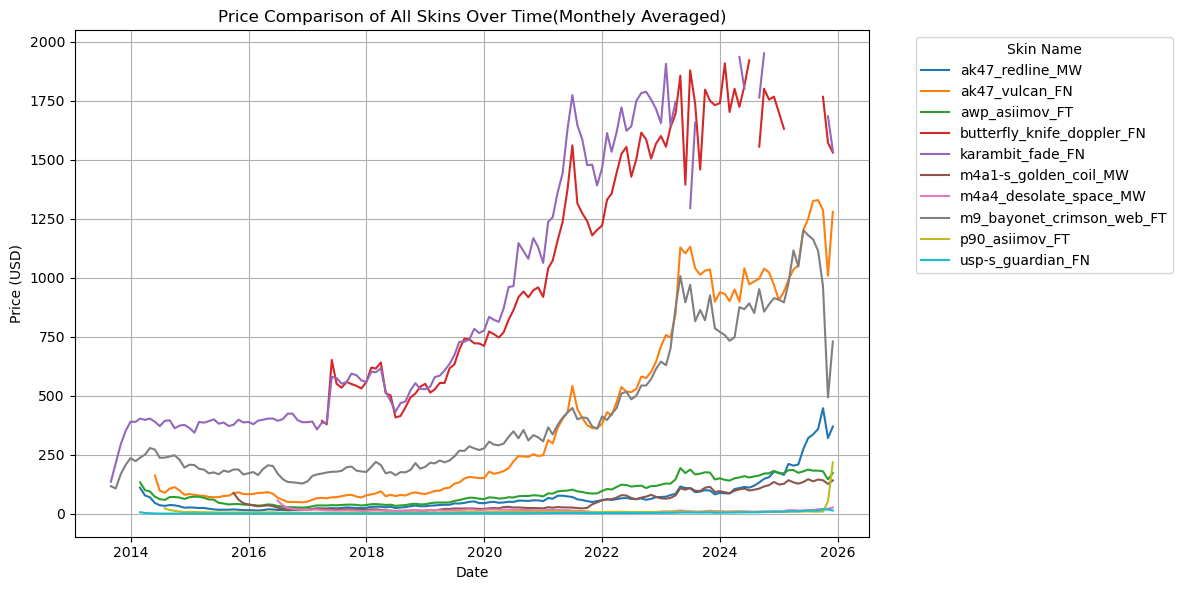

In [9]:
# Plot all skins on the same chart
plt.figure(figsize=(12, 6))
for skin_name in skin_dfs_monthly.keys():
    skin_df = skin_dfs_monthly[skin_name]
    plt.plot(skin_df["date"], skin_df["price"], label=skin_name, linewidth=1.5)

plt.title("Price Comparison of All Skins Over Time(Monthely Averaged)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(title="Skin Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/lk/0_tf3_4j0rs39lr6q2r39sz40000gn/T/ipykernel_34257/2412850360.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  skin_df["price_change_ratio"] = skin_df["price"].pct_change()
/var/folders/lk/0_tf3_4j0rs39lr6q2r39sz40000gn/T/ipykernel_34257/2412850360.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  skin_df["price_change_ratio"] = skin_df["price"].pct_change()


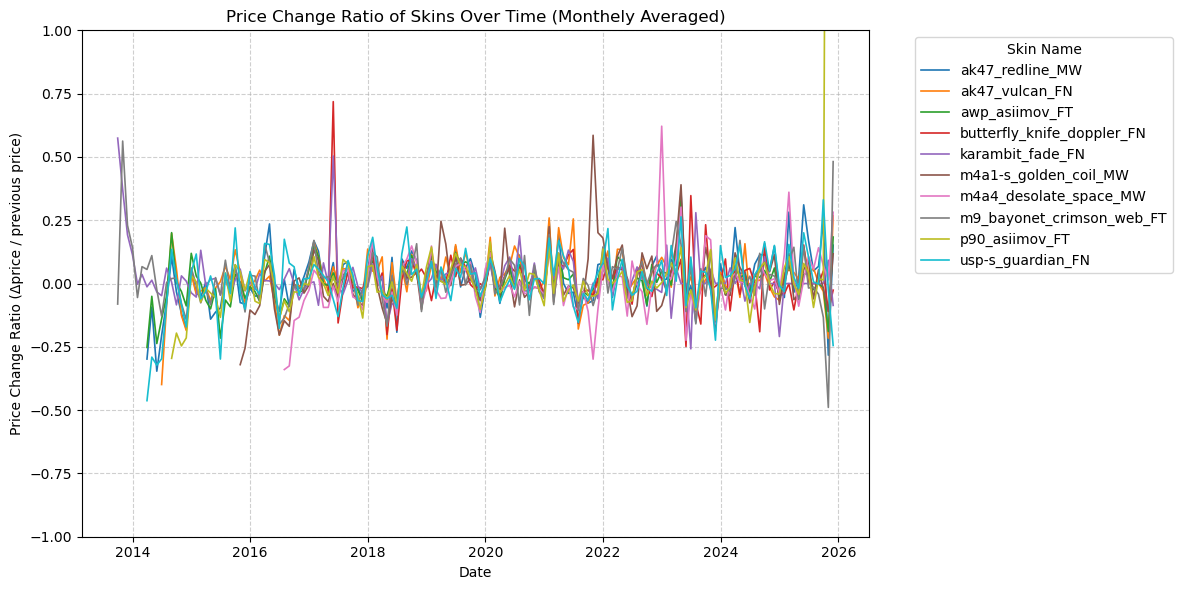

In [ ]:
for skin_name in skin_dfs_monthly.keys():
    skin_df = skin_dfs_monthly[skin_name]
    skin_df["price_change_ratio"] = skin_df["price"].pct_change()

# Plot ratio over time for each skin
plt.figure(figsize=(12, 6))
for skin_name in skin_dfs_monthly.keys():
    skin_df = skin_dfs_monthly[skin_name]
    plt.plot(skin_df["date"], skin_df["price_change_ratio"], label=skin_name, linewidth=1.2)

plt.title("Price Change Ratio of Skins Over Time (Monthely Averaged)")
plt.ylim(-1, 1)
plt.xlabel("Date")
plt.ylabel("Price Change Ratio (Δprice / previous price)")
plt.legend(title="Skin Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()